<div style="height: 100px;"></div>

**<font size=48>K-means Clustering</font>**<br>

**Objective:**
1. Learn how to use the SciKit's K-Means package.
2. Learn how to implement our own K-Means class.
3. Learn how to choose the appropriate number of clusters

<div style="background-color: #f0f0f0; padding: 10px;font-size: 24px;">
  <strong>Table of Contents</strong>
</div>

- [Types of Clustering](#types-of-clustering)
- [How does K-Means clustering work?](#how-does-k-means-clustering-work)
  - [Choosing the right k value](#choosing-the-right-k-value)
    - [Method 1: Manual Calculation of WCSS](#method-1-manual-calculation-of-wcss)
      - [Formula of Within-Cluster Sum of Squares (WCSS)](#formula-of-within-cluster-sum-of-squares-wcss)
    - [Method 2: Automated Knee Point Detection using KneeLocator](#method-2-automated-knee-point-detection-using-kneelocator)
    - [Comparison of Manual and Automated Methods for Determining Optimal Number of Clusters](#Comparison-of-Manual-and-Automated-Methods-for-Determining-Optimal-Number-of-Clusters)
- [Implement K-means Class using k-means package](#implement-K-means-Class-using-k-means-package)
- [Implement K-means Class without k-means package](#implement-K-means-Class-without-k-means-package)
- [Implement K-means in Real World Data](#Implement-k-means-in-real-world-data)

---


## Mount Google Drive

In [30]:
# This is needed if you need to read data from your Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os

# Change the path to where you run the Jupyter Notebook from.
notebook_path = r"/content/drive/MyDrive/LabEnhancements_KMeans"

import os
os.chdir(notebook_path)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/LabEnhancements_KMeans


<a id="types-of-clustering"></a>
## Types Of Clustering

<img src="https://www.researchgate.net/profile/Vivek-Gupta-12/publication/270959713/figure/fig1/AS:295079991365636@1447363960111/Classification-of-clustering-algorithms.png" width="600">

### Example of k-means Clustering in visualization

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*IXGsBrC9FnSHGJVw9lDhQA.png" width="600">

Based on this image, can you notice how many centroids(center points of the clusters) are assigned?

<a id="how-does-k-means-clustering-work"></a>
# How does K-Means clustering work?

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/slide32.JPG" width="600">


1.   Choose a value for K, the total number of clusters.
2.   Randomly choose K points as cluster centers.
3.   Assign the remaining instances to their closest cluster center.
4.   Calculate a new cluster center for each cluster.
5.   Repeat the first three steps until the cluster centers do not change.





### Example of the steps by step

<img src="https://www.learnbymarketing.com/wp-content/uploads/2015/01/method-k-means-steps-example.png" width="900">


<a id="choosing-the-right-k-value"></a>

## Choosing the right k, number of Clusters

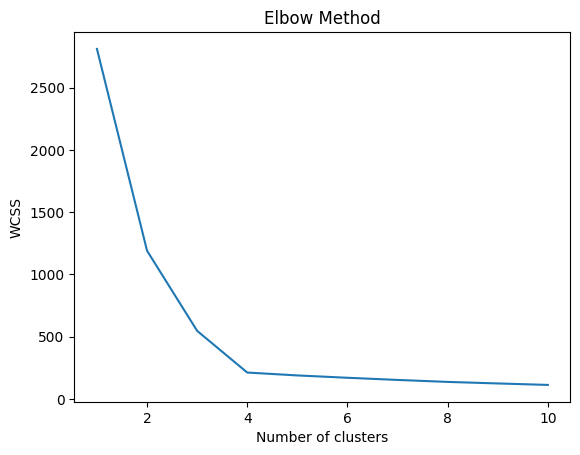

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate Sample Blobs Data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Method 1: Manual Calculation of WCSS
# Calculate within-cluster sum of squares for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<a id="method-1-manual-calculation-of-wcss"></a>

## Method 1: Manual Calculation of WCSS

<a id="formula-of-within-cluster-sum-of-squares-wcss"></a>
### Formula of Within-Cluster Sum of Squares (WCSS)
<img src="https://www.saedsayad.com/images/Clustering_kmeans_c.png" width="600">

In [32]:
# Generate sample data
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

def get_sample_blobs_data():
  features, true_labels = make_blobs(
      n_samples = 200,
      centers = 3,
      cluster_std = 2.75,
      random_state = 42
  )

  scaler = StandardScaler()
  scaled_features = scaler.fit_transform(features)
  # print(type(scaled_features))
  # print(scaled_features.shape)
  return scaled_features


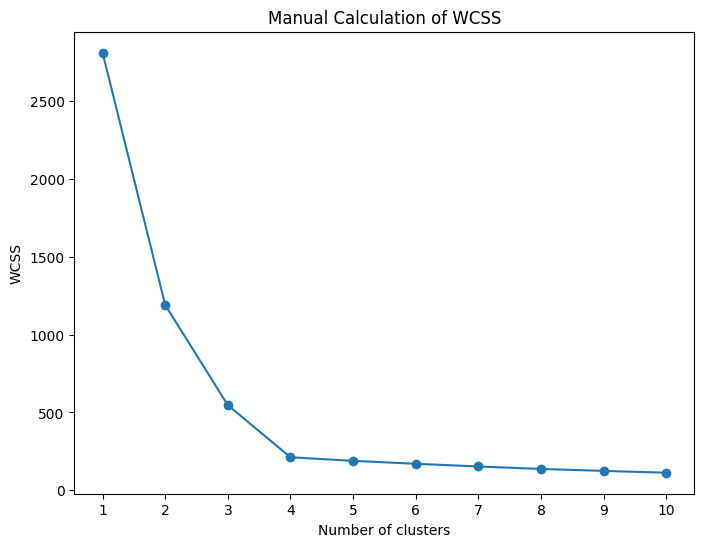

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Method 1: Manual Calculation of WCSS
wcss_manual = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss_manual.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(8, 6))

plt.plot(range(1, 11), wcss_manual, marker='o')
plt.title('Manual Calculation of WCSS')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))

plt.show()


<a id="method-2-automated-knee-point-detection-using-kneelocator"></a>

## Method 2: Automated Knee Point Detection using KneeLocator

In [34]:
!pip install kneed

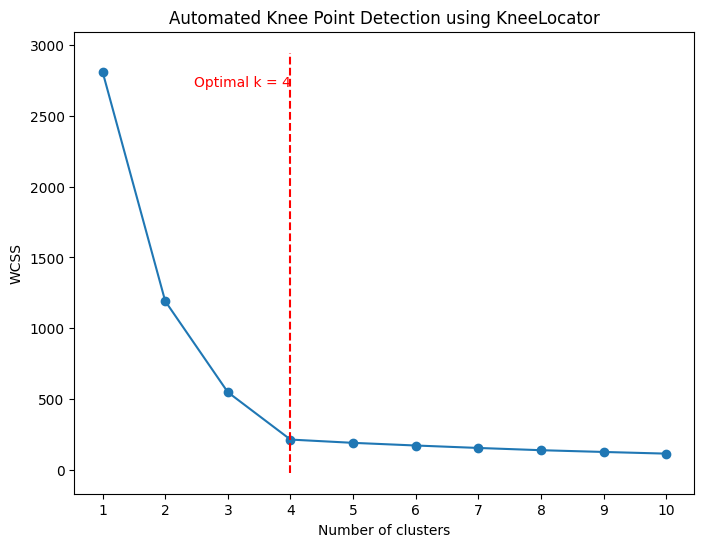

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Method 2: Automated Knee Point Detection using KneeLocator
wcss_manual = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss_manual.append(kmeans.inertia_)

kneedle = KneeLocator(range(1, 11), wcss_manual, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

# Plotting
plt.figure(figsize=(8, 6))

plt.plot(range(1, 11), wcss_manual, marker='o')
plt.title('Automated Knee Point Detection using KneeLocator')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.text(optimal_k, plt.ylim()[1]*0.9, f'Optimal k = {optimal_k}', va='top', ha='right', color='red')

plt.show()


<a id="Comparison-of-Manual-and-Automated-Methods-for-Determining-Optimal-Number-of-Clusters"></a>


## Comparison of Manual and Automated Methods for Determining Optimal Number of Clusters

|                    | Manual Method                                                  | Automated Method                                                |
|:-------------------|:---------------------------------------------------------------|:----------------------------------------------------------------|
| Efficiency         | Can be time-consuming, especially with large datasets or multiple features. | Significantly speeds up the process, especially with large datasets or multiple features. |
| Consistency        | Subject to individual interpretation and may lead to different conclusions. | Applies the same criteria each time, ensuring consistent results. |
| Scalability       | Challenging with large datasets and high-dimensional data.      | Easily handles large datasets and high-dimensional data.        |
| Integration into Pipelines | Difficult to integrate into data processing pipelines.       | Can be integrated into data processing pipelines, allowing for seamless and efficient processing. |


<a id="implement-K-means-Class-using-k-means-package"></a>

## Implement K-means Using K-means package

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


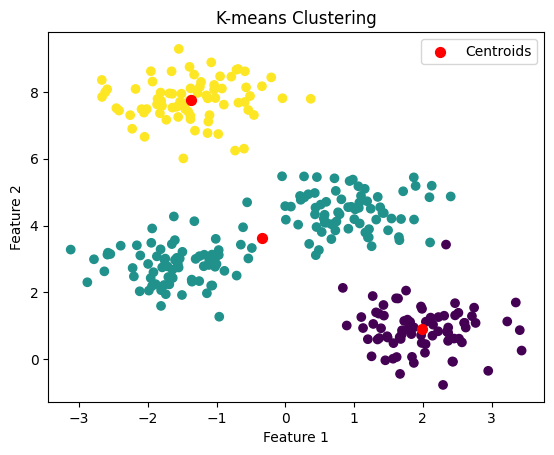

In [36]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Convert X to a NumPy array
X = np.array(X)

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster labels
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker='o', c='red', s=50, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


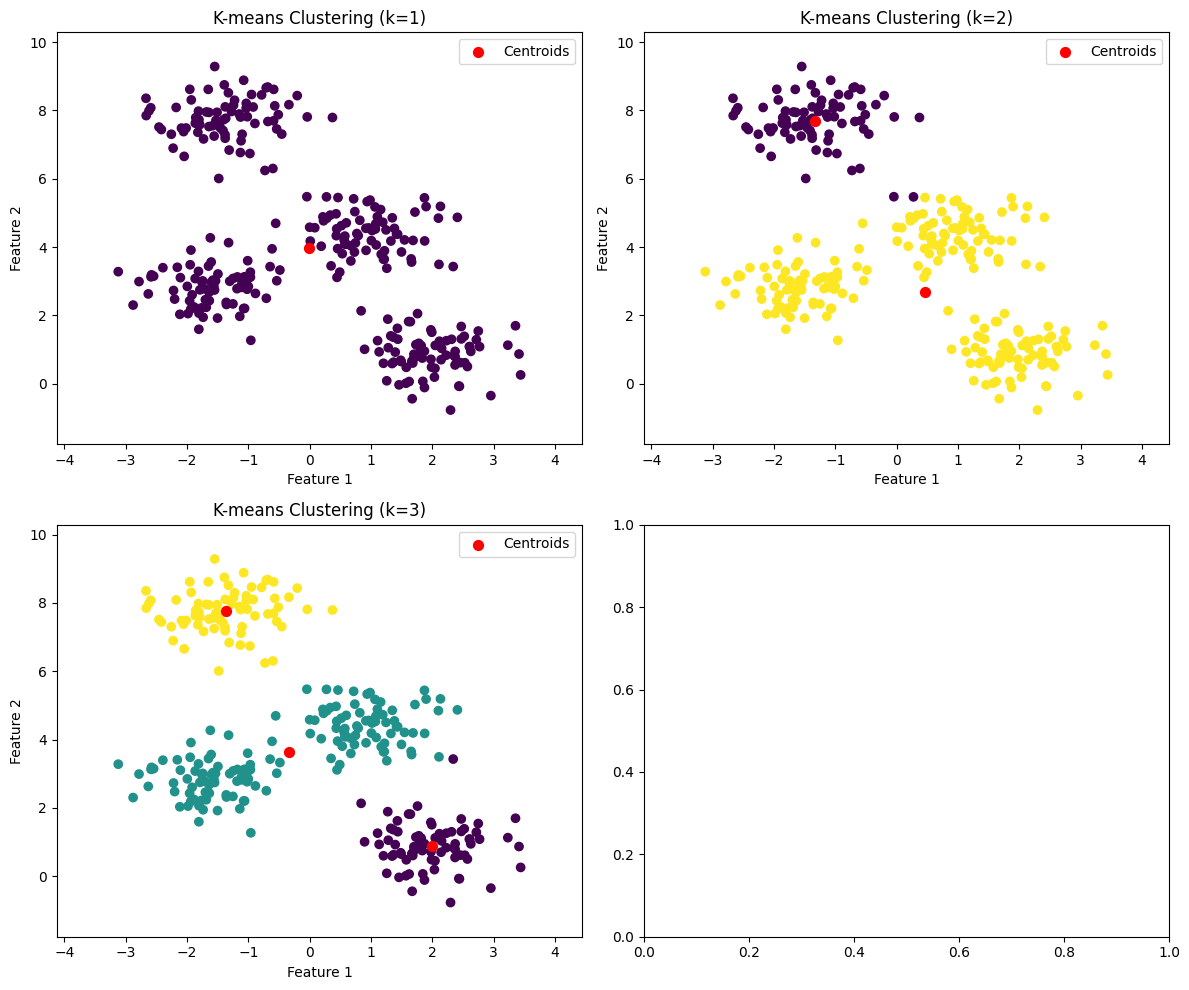

In [37]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


# Define a range of values for k
k_values = [1, 2, 3]

# Create subplots to visualize the clusters for different k values
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, k in enumerate(k_values):
    # Initialize KMeans with the desired number of clusters
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Fit the model to the data
    kmeans.fit(X)

    # Predict the cluster labels
    labels = kmeans.labels_

    # Get the cluster centers
    centers = kmeans.cluster_centers_

    # Plot the clusters
    ax = axs[i // 2, i % 2]  # Retrieve the correct axis from axs
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    ax.scatter(centers[:, 0], centers[:, 1], marker='o', c='red', s=50, label='Centroids')
    ax.set_title(f'K-means Clustering (k={k})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

    # Adjust axis limits
    ax.set_xlim([X[:, 0].min() - 1, X[:, 0].max() + 1])
    ax.set_ylim([X[:, 1].min() - 1, X[:, 1].max() + 1])

plt.tight_layout()
plt.show()


<a id="implement-K-means-Class-without-k-means-package"></a>

## Implement K-means Class without K-means package

### Experiment scikit-learn's K-means Package Using Generated Blobs Data
This code snippet demonstrates the use of scikit-learn's K-means clustering package to analyze artificially generated data blobs. It generates sample data with three clusters using the make_blobs function, scales the features using StandardScaler, and returns the scaled features. The purpose of this code is to showcase how K-means clustering can be applied to simple datasets for exploratory analysis and clustering tasks.

In [38]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

def get_sample_blobs_data():
  features, true_labels = make_blobs(
      n_samples = 200,
      centers = 3,
      cluster_std = 2.75,
      random_state = 42
  )

  scaler = StandardScaler()
  scaled_features = scaler.fit_transform(features)
  # print(type(scaled_features))
  # print(scaled_features.shape)
  return scaled_features

### Visualization and Elbow Method for K-means Clustering

This code provides functions to visualize the results of K-means clustering and determine the optimal number of clusters using the elbow method.

- plot_inertia: Plots the within-cluster sums of squares (WCSS) against the number of clusters, helping to identify the optimal number of clusters.
- get_elbow: Calculates the elbow point in the WCSS plot to determine the optimal number of clusters.
- plot_clusters: Visualizes clustered data points and centroids, with options to customize titles and labels.

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

# Visualising the clusters
default_colors = ["red", "green", "blue", "cyan", "magenta",
          "purple", "beige", "brown", "pink", "orange",
          "yellow", "gray", "black"]

def plot_inertia(WCSS_array, k_max,
                 title = "Number of Clusters",
                 x_label = "within-cluster sums of squares (WCSS)",
                 y_label = "Elbow method to determine optimum number of clusters"
                ):
  k = WCSS_array.size
  K_array = np.arange(1, k_max + 1, 1)
  plt.xlim(1, k_max)
  plt.plot(K_array[:k], WCSS_array)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)


def get_elbow(WCSS_array, k_max):
  K_array = np.arange(1, k_max + 1, 1)
  kl = KneeLocator(K_array, WCSS_array, S = 1.0,
                   curve = "convex", direction = "decreasing")
  return kl.elbow

def plot_clusters(n_clusters, centroids, X, labels,
                  title, x_label, y_label,
                  colors = default_colors):
  for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1],
                s = 20, c = colors[i], label = f"Cluster {i+1}")

  plt.scatter(centroids[:, 0], centroids[:, 1],
                s = 40, c = 'yellow', marker = 's', label = 'Centroids')

  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend(fontsize = "xx-small")


### Main code for K-means Class without K-means package

This Python code defines a custom implementation of the K-means clustering algorithm (MyKMeans). It includes methods for initializing centroids using random or K-means++ methods, assigning labels to data points, and updating centroids iteratively until convergence. The class also provides functions for fitting the model to data, predicting cluster labels for new data, and visualizing the clustering process.

In [40]:
import numpy as np
import random as rd

class MyKMeans:

  def __init__(self,
               n_clusters = 8,
               max_iter = 300,
               init = "ramdom",
               tol = 1e-4, #---------------   maximum time of iteration   ---------------#
               random_state = None,
               n_init = "auto"):

    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.init = init
    self.tol = tol
    self.random_state = random_state
    if n_init == "auto":
      self.n_init = 1
    else:
      self.n_init = n_init

  # randomly initialize the centroids
  def __init_centroids_random(X, n_clusters, random_state = None):

    if random_state != None:
      rd.seed(random_state)

    n_points = X.shape[0]

    # centroids = np.array([]).reshape(0, 2)   # also works
    centroids = np.empty( (0, 2), dtype = float )
    for i in range(n_clusters):
      rand = rd.randint(0, n_points - 1)
      centroids = np.append(centroids, [X[rand]], axis = 0)  # add another centroid

    return centroids

  # initialize the centroids using K-Means++ method
  def __init_centroids_kmeanspp(X, n_clusters, random_state = None):

    if random_state != None:
      rd.seed(random_state)

    n_points = X.shape[0]

    rand = rd.randint(0, n_points - 1)
    centroids = np.array([X[rand]])  # start with 1 random centroid

    # start with 1 centroid,
    #   each iteration adds one more centroid to list centroids
    for k in range(1, n_clusters):

      # dists = np.array([])   # also works
      dists = []
      # For each point, compute the distance to
      #   the nearest centroid amoung the k centroids so far
      for x in [x for x in X if x not in centroids]:
        dist_to_centroids = np.sum((x - centroids) ** 2)
        dists = np.append(dists, np.min(dist_to_centroids))

      probs = dists / np.sum(dists)
      cummulative_probs = np.cumsum(probs)

      # Randomly select a point as centroid
      #   with probability proportion to the distance
      #   of that point to the nearest so-far-selected centroid.
      #   Meaning, we want to select the next centroid
      #   to be as far as possible to the rest of the selected centroids
      rand = rd.random()
      i = 0
      for j, prob in enumerate(cummulative_probs):
        if prob >= rand:
          i = j
          break

      centroids = np.append(centroids, [X[i]], axis = 0)  # add another centroid

    return centroids

  def init_centroids(X, n_clusters, random_state, init = "random"):
    if init == "k-means++":
      centroids = MyKMeans.__init_centroids_kmeanspp(X, n_clusters, random_state)
    else:
      centroids = MyKMeans.__init_centroids_random(X, n_clusters, random_state)

    return centroids

  def assign_labels(X, centroids):

    n_points = X.shape[0]
    n_clusters = centroids.shape[0]

    dists = np.zeros( (n_points, n_clusters) )

    for k in range(n_clusters):
      centroid = centroids[k, :]
      dists[:, k] = np.sum( (X - centroid)**2, axis = 1 )
    labels = np.argmin(dists, axis = 1)

    return labels

  def initialize(self, X):

    self.cluster_centers_ = MyKMeans.init_centroids(X,
                                                    self.n_clusters,
                                                    self.random_state,
                                                    self.init)

    self.labels_ = MyKMeans.assign_labels(X, self.cluster_centers_)

    return self

  def recompute_centroids(self, X):

    n_points = X.shape[0]

    # Adjust the centroids

    # For k = 1, ..., n_clusters,
    #   initialize empty list Y[k] for cluster k,
    #   to store points for cluster k
    Y = {}
    for k in range(self.n_clusters):
      # Y[k] = np.array([]).reshape(0, X.shape[1])   # also works
      Y[k] = np.empty( (0, X.shape[1]), dtype = float )

    # For each point, if the label is k then,
    #   add the point to the list of points Y[k]
    for i in range(n_points):
      k = self.labels_[i]
      Y[k] = np.append(Y[k], X[i].reshape(1,-1), axis = 0)

    # for k in range(self.n_clusters):
    #   print(f"size Y{k} =" + str(Y[k].size))

    # Compute the new centroid for each cluster
    for k in range(self.n_clusters):
      self.cluster_centers_[k, :] = np.mean(Y[k], axis = 0)

    # Within-Cluster Sum of Square
    wcss = 0
    for k in range(self.n_clusters):
      wcss += np.sum((Y[k] - self.cluster_centers_[k, :]) ** 2)
    self.inertia_ = wcss

    self.labels_ = MyKMeans.assign_labels(X, self.cluster_centers_)

    return self

  def fit(self, X, visualize = False):

    self.initialize(X)

    self.n_iter_ = 0

    if visualize == True:

      plot_clusters(self.n_clusters, self.cluster_centers_, X, self.labels_,
                    title = f"k = {self.n_clusters} (Iteration = {self.n_iter_})",
                    x_label = "x",
                    y_label = "y",
                    colors = default_colors)
      plt.show()

    # Compute euclidian distances and assign clusters
    for n in range(self.max_iter):

      centroids_previous = np.copy(self.cluster_centers_)

      self.recompute_centroids(X)

      self.n_iter_ += 1

      if visualize == True:
        plot_clusters(self.n_clusters, self.cluster_centers_, X, self.labels_,
                      title = f"k = {self.n_clusters} (Iteration = {self.n_iter_})",
                      x_label = "x",
                      y_label = "y",
                      colors = default_colors)
        plt.show()

      diff_sq = (self.cluster_centers_ - centroids_previous) ** 2
      diff = np.sqrt(np.sum( np.sum(diff_sq, axis = 1) ))
      if diff < self.tol:
        break

    return self

  def predict(self, X):
    return MyKMeans.assign_labels(X, self.cluster_centers_)

  def fit_predict(self, X):
    self.fit(X)
    return MyKMeans.assign_labels(X, self.cluster_centers_)


### Experimenting with K-Means Clustering on Sample Blobs Data

This code snippet performs K-means clustering on a generated dataset with three clusters. It initializes the K-means algorithm with specific parameters, runs the clustering process for a set number of iterations, and visualizes the clustering results at each iteration. The code aims to demonstrate how the cluster centers and assignments evolve over multiple iterations of the K-means algorithm.

(3, 2)
[[-1.05112764 -1.05029445]
 [ 2.26318104  0.47775508]
 [ 0.33771247  0.14126537]]
[1 2 0 0 0 0 2 0 2 0 2 1 1 2 2 0 2 0 1 0 1 2 0 2 0 2 2 0 2 2 2 1 0 0 2 2 0
 2 0 2 2 2 0 1 0 1 2 0 2 2 0 2 0 2 2 2 0 2 2 2 0 2 0 0 0 0 2 2 0 2 2 0 2 2
 2 1 2 2 1 2 2 2 0 0 0 0 0 2 2 0 2 2 2 2 2 0 2 2 1 2 0 0 2 0 2 2 0 2 1 0 1
 1 2 0 2 0 0 2 2 2 0 1 2 0 0 2 2 2 2 2 1 0 2 0 0 1 2 1 2 1 2 2 0 2 2 2 2 0
 0 2 2 0 1 0 2 0 0 2 1 1 2 2 1 0 2 1 2 2 0 1 0 2 2 0 2 1 2 2 2 2 2 2 0 0 0
 2 1 2 2 2 2 2 0 0 2 0 2 2 2 2]


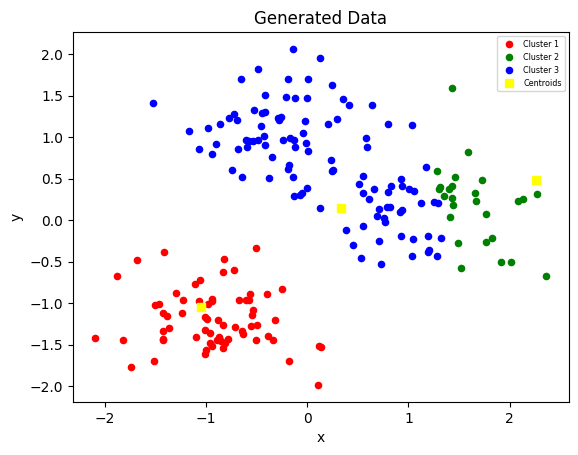

(3, 2)
[[-0.91941183 -1.18551732]
 [ 1.67765126  0.19561116]
 [ 0.1538114   0.69951094]]
[1 2 0 0 0 0 2 0 2 0 2 1 1 1 2 0 2 0 1 0 1 1 0 2 0 2 2 0 2 2 2 1 0 0 2 2 0
 2 0 2 2 2 0 1 0 1 1 0 2 2 0 2 0 2 2 2 0 1 2 2 0 2 0 0 0 0 2 2 0 2 2 0 2 2
 2 1 2 2 1 2 2 1 0 0 0 0 0 2 1 0 1 2 2 2 1 0 2 1 1 2 0 0 2 0 2 1 0 1 1 0 1
 1 2 0 2 0 0 2 2 2 0 1 2 0 0 1 2 2 2 2 1 0 2 0 0 1 1 1 2 1 2 2 0 2 1 2 2 0
 0 1 2 0 1 0 1 0 0 2 1 1 2 1 1 0 2 1 1 2 0 1 0 2 2 0 2 1 2 2 2 2 2 2 0 0 0
 2 1 1 1 2 2 2 0 0 2 0 2 2 2 2]


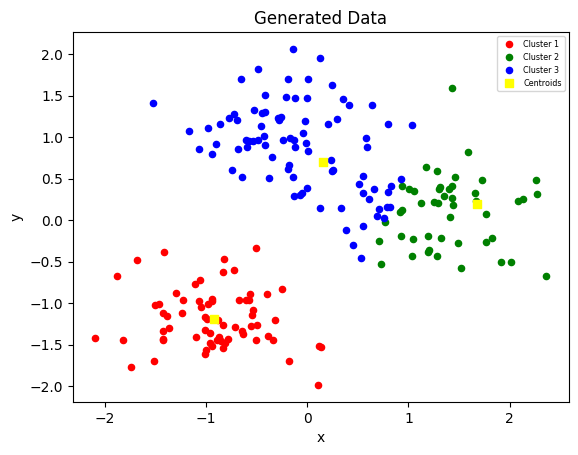

(3, 2)
[[-0.91941183 -1.18551732]
 [ 1.41273728  0.09919731]
 [-0.05579139  0.86938822]]
[1 2 0 0 0 0 2 0 1 0 1 1 1 1 2 0 2 0 1 0 1 1 0 2 0 2 2 0 2 1 1 1 0 0 2 2 0
 2 0 2 1 2 0 1 0 1 1 0 1 2 0 2 0 2 2 2 0 1 2 2 0 2 0 0 0 0 2 2 0 2 2 0 2 1
 2 1 1 2 1 2 2 1 0 0 0 0 0 2 1 0 1 2 2 2 1 0 2 1 1 2 0 0 2 0 2 1 0 1 1 0 1
 1 2 0 2 0 0 2 2 2 0 1 2 0 0 1 2 2 1 2 1 0 2 0 0 1 1 1 2 1 2 2 0 2 1 2 1 0
 0 1 2 0 1 0 1 0 0 2 1 1 2 1 1 0 2 1 1 2 0 1 0 2 1 0 2 1 2 2 2 2 2 1 0 0 0
 2 1 1 1 2 2 1 0 0 2 0 2 2 1 1]


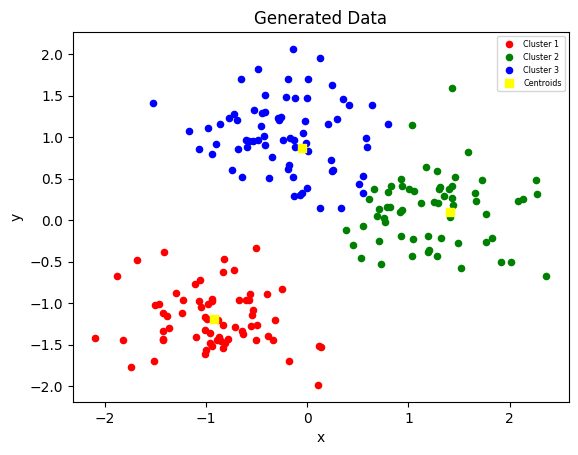

(3, 2)
[[-0.91941183 -1.18551732]
 [ 1.24095637  0.11700776]
 [-0.21603806  1.01655182]]
[1 2 0 0 0 0 2 0 1 0 1 1 1 1 2 0 2 0 1 0 1 1 0 2 0 2 2 0 2 1 1 1 0 0 2 2 0
 2 0 2 1 2 0 1 0 1 1 0 1 2 0 2 0 2 2 2 0 1 2 1 0 2 0 0 0 0 2 2 0 2 2 0 2 1
 1 1 1 2 1 2 2 1 0 0 0 0 0 2 1 0 1 2 2 2 1 0 2 1 1 2 0 0 2 0 2 1 0 1 1 0 1
 1 2 0 2 0 0 2 2 2 0 1 2 0 0 1 2 2 1 2 1 0 2 0 0 1 1 1 2 1 2 2 0 1 1 2 1 0
 0 1 2 0 1 0 1 0 0 2 1 1 2 1 1 0 2 1 1 2 0 1 0 2 1 0 2 1 2 2 2 1 2 1 0 0 0
 2 1 1 1 2 2 1 0 0 2 0 2 2 1 1]


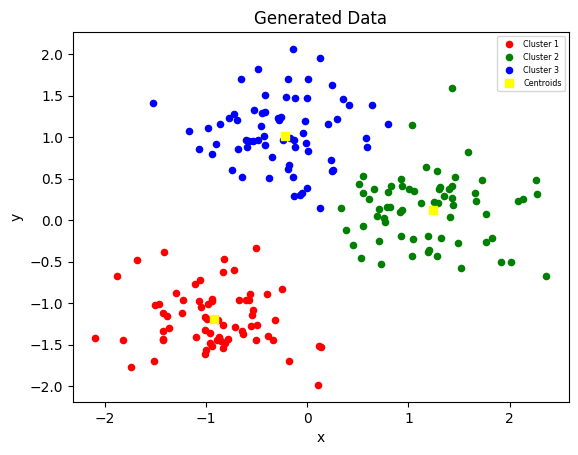

(3, 2)
[[-0.91941183 -1.18551732]
 [ 1.19539276  0.13158148]
 [-0.25813925  1.05589975]]
[1 2 0 0 0 0 2 0 1 0 1 1 1 1 2 0 2 0 1 0 1 1 0 2 0 2 2 0 2 1 1 1 0 0 2 2 0
 2 0 2 1 2 0 1 0 1 1 0 1 2 0 2 0 2 2 2 0 1 2 1 0 2 0 0 0 0 2 2 0 2 2 0 2 1
 1 1 1 2 1 2 2 1 0 0 0 0 0 2 1 0 1 2 2 2 1 0 2 1 1 2 0 0 2 0 2 1 0 1 1 0 1
 1 2 0 2 0 0 2 2 2 0 1 2 0 0 1 2 2 1 2 1 0 2 0 0 1 1 1 2 1 2 2 0 1 1 2 1 0
 0 1 2 0 1 0 1 0 0 2 1 1 2 1 1 0 2 1 1 2 0 1 0 2 1 0 2 1 2 2 2 1 2 1 0 0 0
 2 1 1 1 2 2 1 0 0 2 0 2 2 1 1]


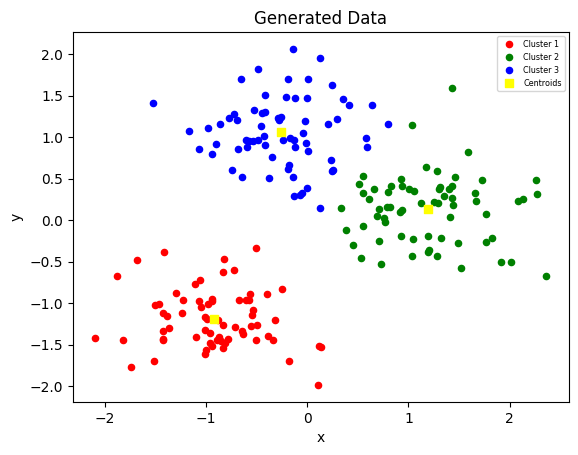

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

X = get_sample_blobs_data()

n_clusters = 3

mykmeans = MyKMeans(
    init = "k-means++",   # another option is "random"
    # init = "random",
    n_clusters = n_clusters,
    n_init = "auto",
    max_iter = 100,
    random_state = 42
)

mykmeans.initialize(X)

n_iter = 5

for i in range(n_iter):
  print(mykmeans.cluster_centers_.shape)
  print(mykmeans.cluster_centers_)
  print(mykmeans.labels_)

  plot_clusters(n_clusters, mykmeans.cluster_centers_, X, mykmeans.labels_,
                title = "Generated Data",
                x_label = "x",
                y_label = "y",
                colors = default_colors)

  mykmeans.recompute_centroids(X)

  plt.show()

<a id="Implement-k-means-in-real-world-data"></a>

## Implement K-means in real world data

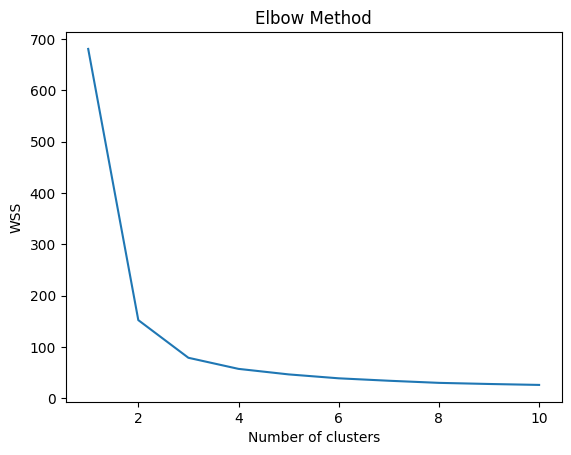

In [42]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Load the Iris dataset from a CSV file
data = pd.read_csv('iris.csv')

# Assuming the last column is 'species', we drop it as it's not used in the clustering
X = data.drop('species', axis=1)

# Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

# Plot the WSS values
plt.plot(range(1, 11), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


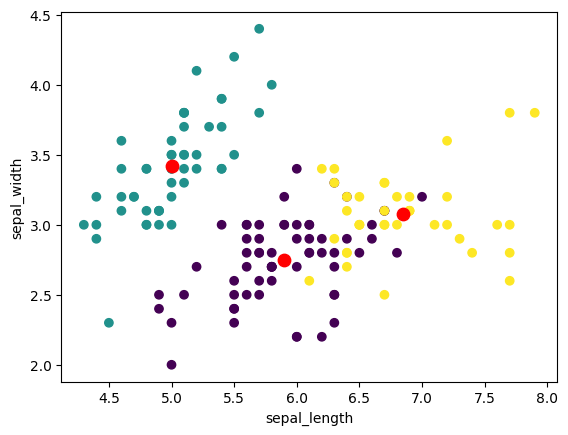

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Iris dataset from a CSV file
data = pd.read_csv('iris.csv')

# Assuming the last column is 'species', we drop it as it's not used in the clustering
X = data.drop('species', axis=1)

# Create a KMeans instance with 3 clusters (because we have 3 species of Iris in the dataset)
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Predict the clusters for the data
predictions = kmeans.predict(X)

# Plot the data points with colors representing their predicted clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=predictions, cmap='viridis')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=80, c='red')

# Add labels to the axes
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.show()
